In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [3]:
import zipfile
import os

# Path to the ZIP file
zip_path = '/kaggle/input/dogs-vs-cats/train.zip'
extract_dir = '/kaggle/working'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [4]:
import os

# Check the root extraction path
root_dir = '/kaggle/working'
train_dir = os.path.join(root_dir, 'train')
test_dir= os.path.join(root_dir, 'test1')

# Count and preview files
all_files = os.listdir(train_dir)
print(f"Total files in 'train/': {len(all_files)}")

# Separate by class for info
cat_files = [f for f in all_files if f.startswith('cat')]
dog_files = [f for f in all_files if f.startswith('dog')]

print(f"Number of cat images: {len(cat_files)}")
print(f"Number of dog images: {len(dog_files)}")
print("\nSample filenames:")
print("Cats:", cat_files[:5])
print("Dogs:", dog_files[:5])

Total files in 'train/': 25000
Number of cat images: 12500
Number of dog images: 12500

Sample filenames:
Cats: ['cat.3140.jpg', 'cat.8064.jpg', 'cat.5883.jpg', 'cat.8872.jpg', 'cat.10661.jpg']
Dogs: ['dog.11229.jpg', 'dog.4557.jpg', 'dog.8851.jpg', 'dog.7115.jpg', 'dog.1279.jpg']


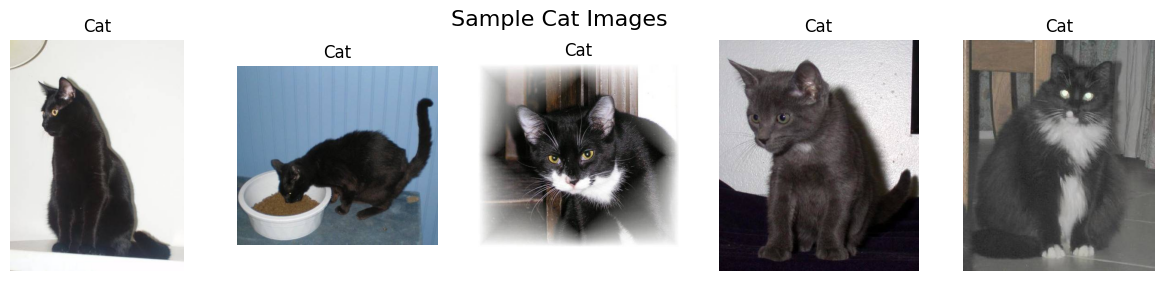

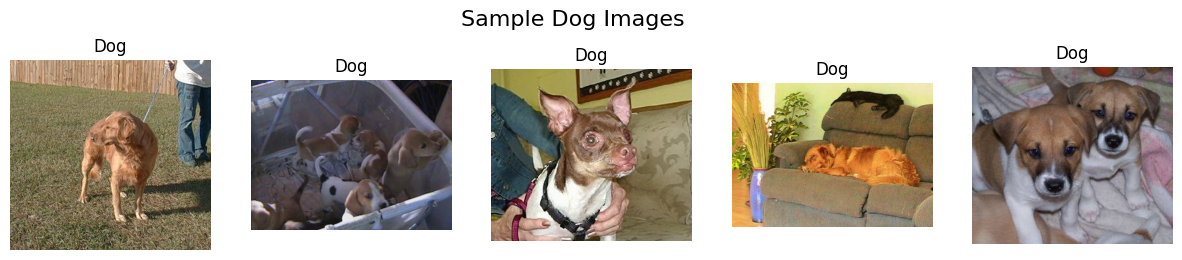

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random


# Get file lists
cat_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.startswith('cat')]
dog_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.startswith('dog')]

# Randomly select 5 images from each class
sample_cats = random.sample(cat_files, 5)
sample_dogs = random.sample(dog_files, 5)

# Plot cats
plt.figure(figsize=(15, 3))
for i, file in enumerate(sample_cats):
    img = Image.open(os.path.join(train_dir, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title("Cat")
    plt.axis('off')
plt.suptitle("Sample Cat Images", fontsize=16)
plt.show()

# Plot dogs
plt.figure(figsize=(15, 3))
for i, file in enumerate(sample_dogs):
    img = Image.open(os.path.join(train_dir, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title("Dog")
    plt.axis('off')
plt.suptitle("Sample Dog Images", fontsize=16)
plt.show()


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

2025-05-08 05:22:49.313421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746681769.517870      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746681769.643450      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0000 00:00:1746681782.160300      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
def features_extractor(img_path):
    img=load_img(img_path,target_size=(224,224))
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)
    features=model.predict(img_array,verbose=0)
    features=features.flatten()
    return features/np.linalg.norm(features)

In [20]:
features=[]
lables=[]
for img in cat_files:
    features.append(features_extractor(img))
    lables.append('cat')#cat
for img in dog_files:
    features.append(features_extractor(img))
    lables.append('dog')#cat

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [24]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("accuracy: ",accuracy)

Precision: 0.9868011195526655
Recall: 0.9868
F1 Score: 0.9867999281886795
accuracy:  0.9868


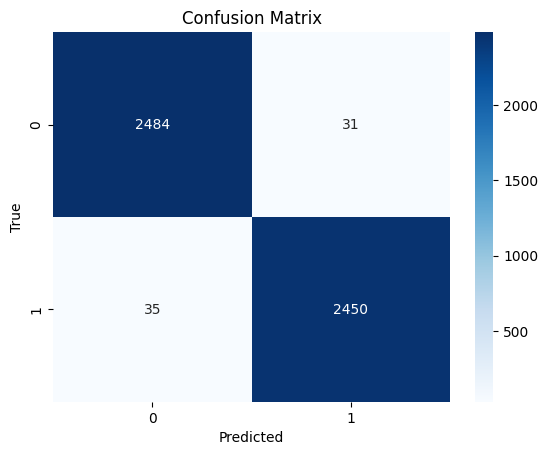

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()